# 순환 신경망

In [7]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
# 토큰의 개수
len(train_input[0])

218

In [4]:
# 토큰의 개수
len(train_input[1])

189

In [5]:
# 리뷰가 긍정인지 부정인지 확인
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
# 데이터 분류
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [8]:
# 리뷰의 길이 확인
lengths = np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


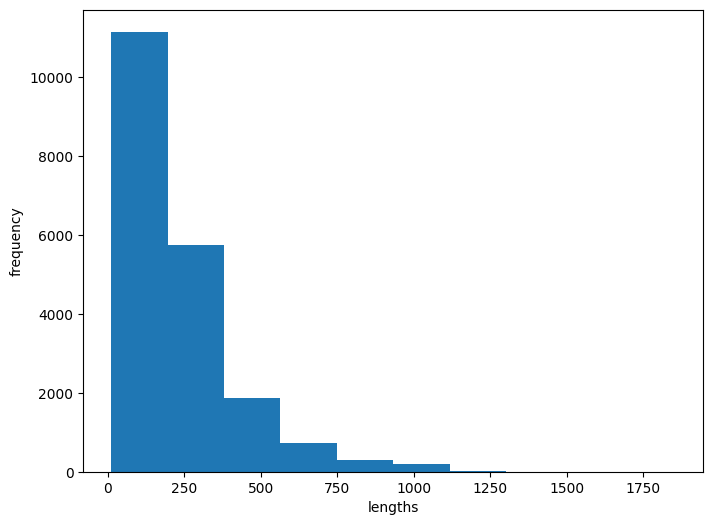

In [10]:
# 리뷰 길이 시각화
plt.figure(figsize=(8,6))
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()


In [12]:
# 리뷰 데이터 길이 맞추기 위해 변환
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [13]:
print(train_seq.shape)

(20000, 100)


In [14]:
# 검증 데이터 길이 맞추기 위해 변환
val_seq = pad_sequences(val_input, maxlen=100)

## 1. 원핫 인코딩 방식의 SimpleRNN

In [15]:
# 모델 구축
from tensorflow import keras
from keras.layers import SimpleRNN, Dense

model = keras.Sequential()
model.add(SimpleRNN(8, input_shape=(100,500)))
model.add(Dense(1, activation='sigmoid'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-03-03 00:37:01.976551: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-03 00:37:01.977076: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
train_oh = keras.utils.to_categorical(train_seq)

In [17]:
print(train_oh.shape)

(20000, 100, 500)


In [18]:
val_oh = keras.utils.to_categorical(val_seq)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 모델 구축

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [21]:
# 모델 훈련
hist = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target),
                 callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2023-03-03 00:44:28.559004: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-03 00:44:30.408329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5010

2023-03-03 00:57:43.531443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 825s 3s/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.7038 - val_accuracy: 0.5056
Epoch 2/100
111/313 [=========>....................] - ETA: 7:59 - loss: 0.6931 - accuracy: 0.5086

KeyboardInterrupt: 

## 2. 임베딩 방식의 SimpleRNN

In [ ]:
from keras.layers import Embedding, SimpleRNN, Dense

model2 = keras.Sequential
model2.add(Embedding(500, 16, input_length=100))
model2.add(SimpleRNN(8))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.summary()

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model2.compile(optimizer=rmsprop, loss='binary_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [ ]:
hist2 = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                   validatio_data=(val_seq, val_target),
                   callbacks=['checkpoint_cb', 'early_stopping_cb'])

In [ ]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()